# DATASET FEATURES

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Data Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#Checking the presence of null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Count'>

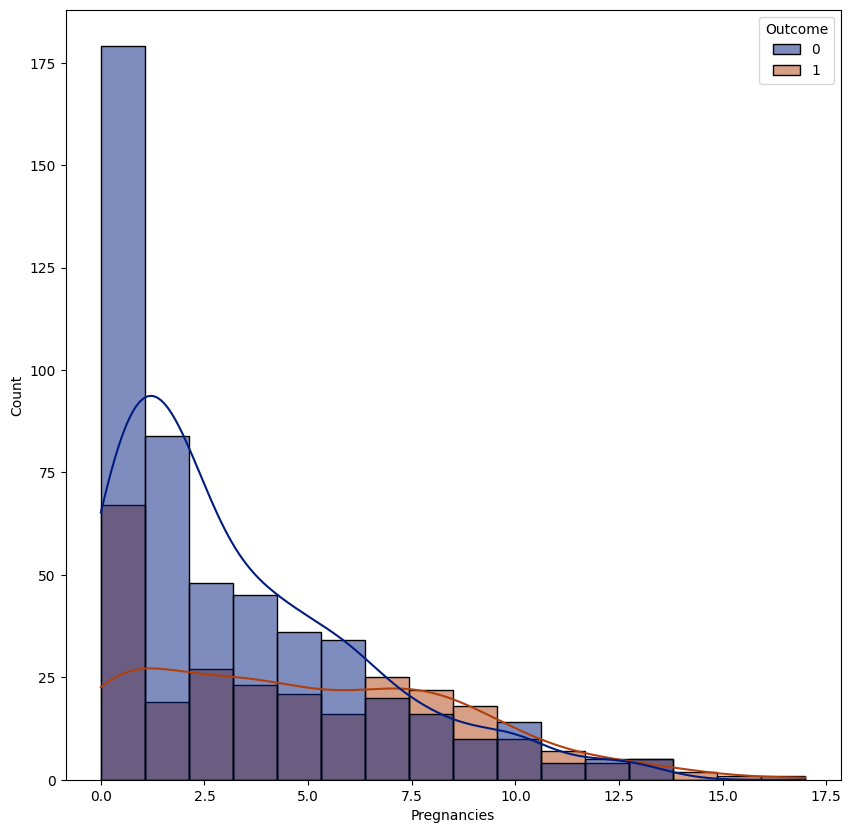

In [6]:
# Visualisation
plt.figure(figsize = (10,10))
sns.histplot(x ="Pregnancies", hue = "Outcome",data=df, kde = True,palette="dark")

<Axes: xlabel='Glucose', ylabel='Count'>

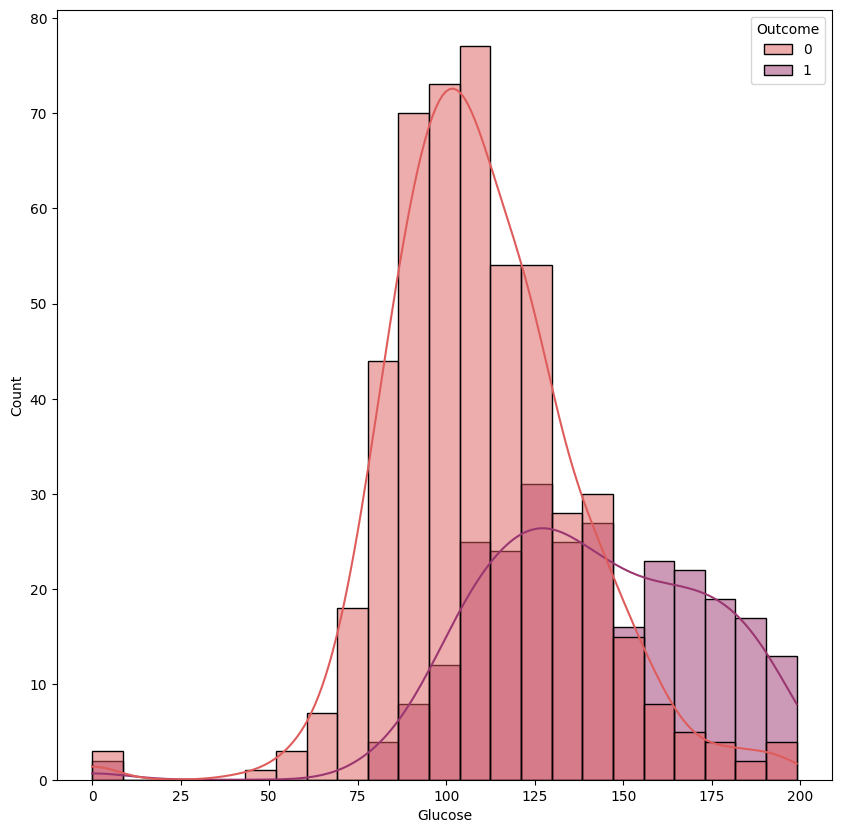

In [7]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Glucose", hue = "Outcome",data=df, kde = True,palette = "flare")

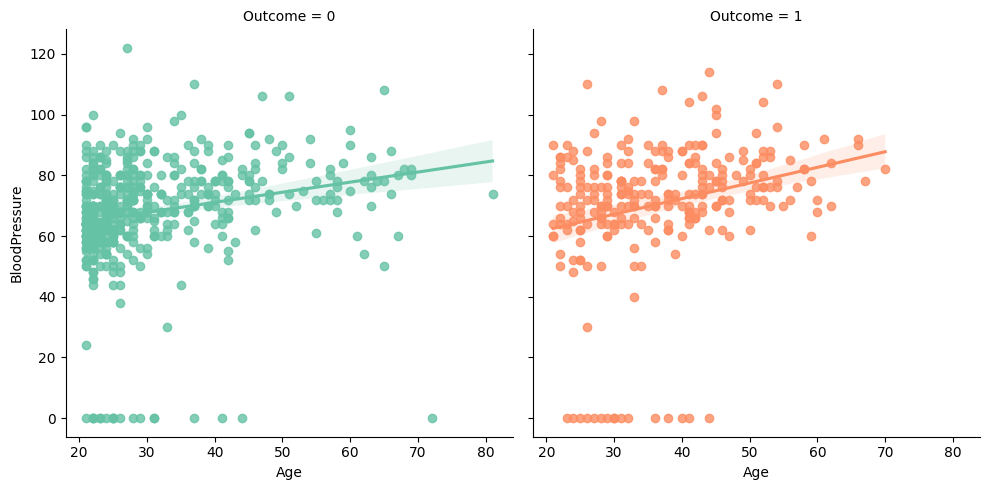

In [8]:
sns.lmplot(data=df, x="Age", y="BloodPressure",hue = "Outcome",palette="Set2",col = "Outcome")

# UNSUPERVISED LEARNING 

In [9]:
#Import the relevant libraries and modules.
from sklearn.preprocessing import StandardScaler                    
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from adjustText import adjust_text
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split


# PERFORM PCA 

- We first perform Principal component analysis (PCA) as it is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.
- In other words this is also recognised as Dimensionality Reduction which is the process of reducing the number of random variables under consideration by getting a set of principal variables by use of principal components so ast to simplify the data without losing too much information.
- By doing PCA first before clustering in this unsupervised learning project all the important information is retained. 


In [10]:
# Train, test splits
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [11]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
pca = PCA()
pca_df = pca.fit_transform(std_df)

In [12]:
# components
pca.components_


array([[-0.21599835, -0.43675677, -0.30045538, -0.30729203, -0.33633235,
        -0.39734198, -0.23763447, -0.27865556, -0.41565279],
       [-0.52744611, -0.09563451, -0.04625339,  0.44839783,  0.35534569,
         0.21031643,  0.17519467, -0.53320237, -0.15476805],
       [-0.16451225,  0.39141738, -0.62970532, -0.29432599,  0.14165347,
        -0.2519303 ,  0.2853247 , -0.1261179 ,  0.39461511],
       [ 0.16088274, -0.32712336,  0.01105718,  0.07401586, -0.09763514,
        -0.16321892,  0.87352658,  0.17111166, -0.18167421],
       [ 0.21176571,  0.10877916, -0.05937792,  0.1718095 ,  0.65037442,
        -0.52745778, -0.15655457,  0.20428857, -0.37793701],
       [ 0.4567731 , -0.38274945, -0.6078671 ,  0.39795678,  0.00873019,
         0.24100789, -0.17162837, -0.00105491,  0.17137898],
       [ 0.07851795, -0.20799965,  0.32670833,  0.28199843, -0.08221649,
        -0.57252374, -0.05719014, -0.29942807,  0.58037812],
       [-0.54064221,  0.02524536, -0.16280013,  0.43491377, -0

In [29]:
# compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.
X_mean = X.mean()
X_std = X.std()
c = ((X - X_mean) / X_std).cov()
eigenvalues, eigenvectors = np.linalg.eig(c)
print("Eigenvector: \n",eigenvectors,"\n")
print("Eigenvalues: \n", eigenvalues, "\n")


# Explained Variance to give us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.
explained_var = np.cumsum(eigenvalues ) / np.sum(eigenvalues)
explained_var

Eigenvector: 
 [[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]] 

Eigenvalues: 
 [2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439
 0.87552904 1.02962987] 



array([0.26179749, 0.47819876, 0.53067578, 0.58123354, 0.66656209,
       0.76185514, 0.87129627, 1.        ])

In [30]:
# Calculating the explained variance on each of components

explained_var = []
for i in eigenvalues:
     explained_var.append((i/sum(eigenvalues))*100)
        
print(explained_var)

[26.179749316110033, 21.64012675774652, 5.247702246321921, 5.055775598698365, 8.532854849331157, 9.529304819389637, 10.944113047600448, 12.870373364801921]


- 26.18% of the variance on our data is explained by the first principal component, the second principal component explains 21.64% of data.

In [14]:
#Explained Variance Ratio

pca.explained_variance_ratio_



array([0.26138907, 0.19714578, 0.12446946, 0.09799499, 0.09384705,
       0.08165203, 0.05426927, 0.04646457, 0.0427678 ])

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

8

In [16]:
# To check the exact and cumulative explained variance per component to decide on the optimal component number for our analysis
# The one to expain the calculations is : explained_variance_ratio_() function

explained_variance = pd.DataFrame([pca.explained_variance_ratio_,
                                   pca.explained_variance_ratio_.cumsum()]).T

explained_variance.columns = ['Exp Var', 'Cum Exp Var']
explained_variance 

,Exp Var,Cum Exp Var
0,0.261389,0.261389
1,0.197146,0.458535
2,0.124469,0.583004
3,0.097995,0.680999
4,0.093847,0.774846
5,0.081652,0.856498
6,0.054269,0.910768
7,0.046465,0.957232
8,0.042768,1.000000


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(std_df)


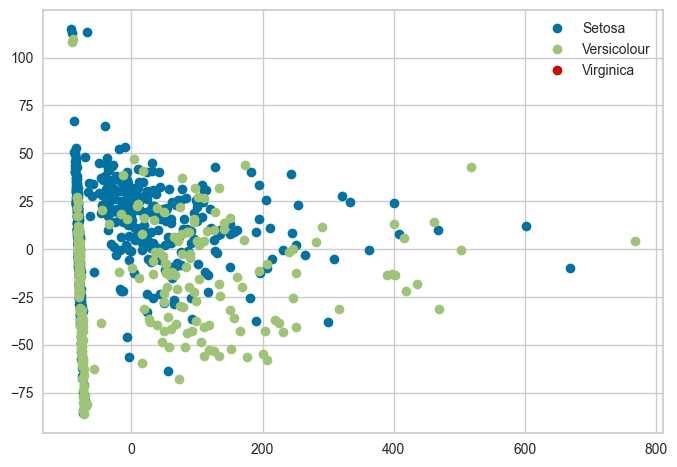

In [18]:
# Using PCA from sklearn PCA
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [19]:
#Now let's check out the percent of variance that can be explained by each of the selected components.

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                          X_train)))



1 component: 88.85% of initial variance
-0.002 x Pregnancies + 0.098 x Glucose + 0.016 x BloodPressure + 0.061 x SkinThickness + 0.993 x Insulin + 0.014 x BMI + 0.001 x DiabetesPedigreeFunction + -0.004 x Age
2 component: 6.16% of initial variance
-0.023 x Pregnancies + -0.972 x Glucose + -0.142 x BloodPressure + 0.058 x SkinThickness + 0.095 x Insulin + -0.047 x BMI + -0.001 x DiabetesPedigreeFunction + -0.140 x Age


In [28]:
# Using np.linalg.eig function

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

NameError: name 'covariance_matrix' is not defined

In [ ]:
# Calculating the explained variance on each of components

variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

In [20]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

ValueError: n_components=154 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
 inc_pca.partial_fit(X_batch)
 
X_reduced = inc_pca.transform(X_train)


ValueError: n_components=154 invalid for n_features=8, need more rows than columns for IncrementalPCA processing

In [ ]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
pca_obj = PCA(n_components=256)
ipca_obj = IncrementalPCA(n_components=256, batch_size=1000)
pca_obj.fit(X_train)
ipca_obj.fit(X_train)


ValueError: n_components=256 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

# WORKING WITH KMeans CLUSTERING 


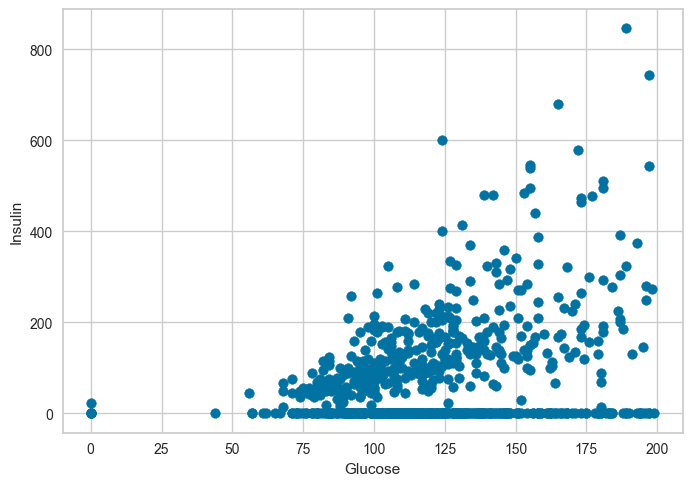

In [21]:
#data1 visualization
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


- ELBOW METHOD

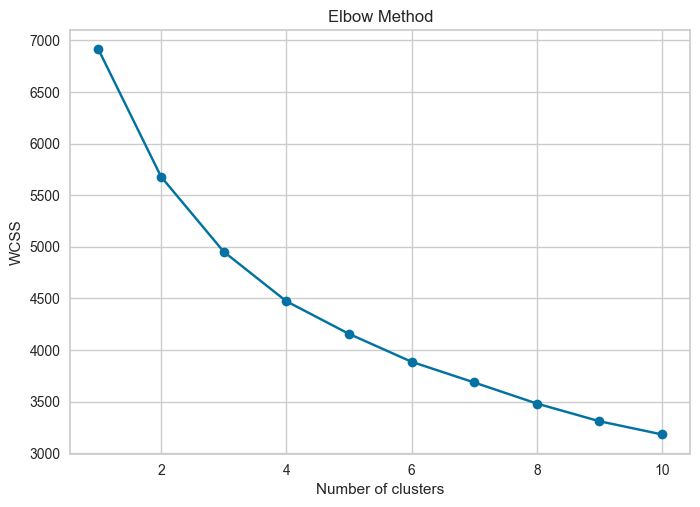

In [23]:
# Calculate the within cluster sum of squares for each cluster number to help us determine the ideal cluster number.
# To evaluate the results, we will use the ELBOW method. For other statistics and selection methods

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, '-o')                                   
# Plot Elbow graph
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [24]:
# Init Model
km_model = KMeans(n_clusters=4)

#Fit predict
y_pred = km_model.fit_predict(pca_df)
y_pred

array([0, 1, 0, 1, 2, 1, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 3, 3, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 3, 0, 0, 3, 2, 3, 0, 0, 2,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 0, 1, 3, 0, 1,
       3, 0, 1, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 3, 0, 3,
       0, 1, 1, 3, 3, 0, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       2, 2, 3, 1, 2, 0, 0, 1, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0,
       2, 0, 1, 3, 3, 3, 1, 3, 0, 3, 3, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 2,
       0, 2, 1, 3, 1, 0, 3, 0, 3, 1, 0, 0, 3, 1, 1, 3, 0, 2, 1, 3, 1, 2,
       1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 3,
       2, 2, 3, 3, 3, 1, 0, 1, 2, 0, 3, 0, 1, 3, 0, 2, 0, 2, 3, 3, 3, 0,
       2, 0, 1, 0, 1, 3, 1, 2, 2, 3, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 3,
       1, 2, 3, 0, 0, 2, 2, 1, 0, 1, 1, 3, 0, 3, 3, 1, 3, 2, 3, 1, 3, 0,
       0, 3, 3, 3, 1, 1, 2, 1, 1, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       2, 2, 1, 3, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 3,

In [25]:
km_model.cluster_centers_

array([[-0.63643947, -1.65681438],
       [ 1.71501838, -0.0516986 ],
       [-2.21930986,  0.83496624],
       [ 0.26167312,  0.98356217]])

- SILHOUETTE METHOD

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
training_data=[X_train]
silhouette_scores = dict()
range_of_k = range(2,10) 
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(X_train)
    cluster_labels = trained_model.labels_
    score=silhouette_score(X_train, cluster_labels)
    silhouette_scores[k]=score
print("The k and associated Silhouette scores are: ",silhouette_scores)

The k and associated Silhouette scores are:  {2: 0.5470640196503376, 3: 0.5203476246341971, 4: 0.4206887338224402, 5: 0.37473934962431926, 6: 0.3254074888444255, 7: 0.3083947707198068, 8: 0.3376408278679323, 9: 0.3264519290922422}


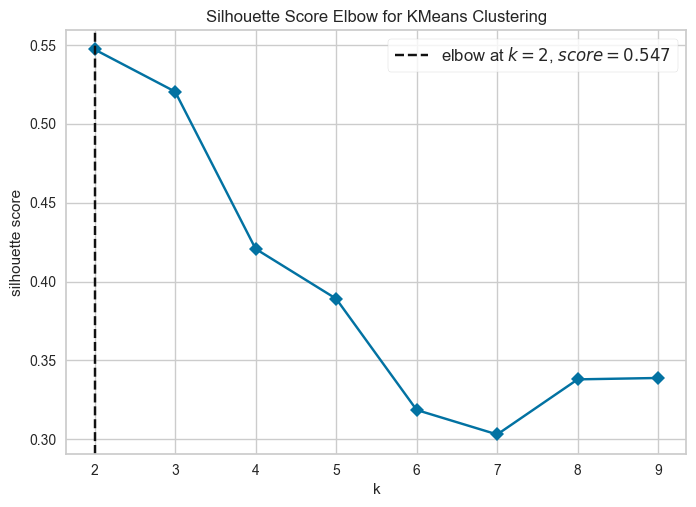

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
# Check the silhouette score 
# Instantiate the KMeans model

sil_df = KMeans(random_state=0)

#Visualise the number of clusters with KElbowVisualizer
visualizer = KElbowVisualizer(sil_df, k=(2,10), metric='silhouette', timings=False)

#Fit the data and visualize
visualizer.fit(X_train)    
visualizer.poof() 